In [4]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [58]:
# Target Account
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# Variables for holding sentiments
all_tweets = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in target_user:

    # Get all tweets from home feed
    public_tweets = api.user_timeline(screen_name=x, count=100)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        
        raw_time = tweet["created_at"]
        converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
                
        # Add each value to the appropriate list
        tweet_stat_dict={
        "Name": x,
        "Date": converted_time,
        "Compound":results["compound"],
        "Neutral":results["neu"],
        "Positive":results["pos"],
        "Negative":results["neg"]}
        
        all_tweets.append(tweet_stat_dict)

In [64]:
# Convert sentiments to DataFrame
news_df=pd.DataFrame(all_tweets)
news_df.to_csv('news_df.csv', index=False)
BBC_df=news_df.loc[news_df["Name"]=="@BBC",:].reset_index(drop=True)
CBS_df=news_df.loc[news_df["Name"]=="@CBS",:].reset_index(drop=True)
CNN_df=news_df.loc[news_df["Name"]=="@CNN",:].reset_index(drop=True)
FoxNews_df=news_df.loc[news_df["Name"]=="@FoxNews",:].reset_index(drop=True)
nytimes_df=news_df.loc[news_df["Name"]=="@nytimes",:].reset_index(drop=True)

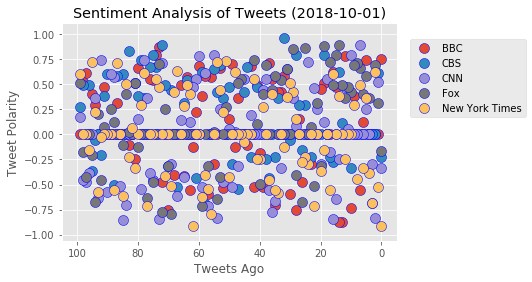

In [67]:
# Create plot
plt.scatter(BBC_df.index,BBC_df["Compound"],alpha=1, edgecolors='b', s=100,label="BBC")
plt.scatter(CBS_df.index,CBS_df["Compound"],alpha=1, edgecolors='b', s=100,label="CBS")
plt.scatter(CNN_df.index,CNN_df["Compound"],alpha=1, edgecolors='b', s=100,label="CNN")
plt.scatter(FoxNews_df.index,FoxNews_df["Compound"],alpha=1, edgecolors='b', s=100,label="Fox")
plt.scatter(nytimes_df.index,nytimes_df["Compound"],alpha=1, edgecolors='b', s=100,label="New York Times")

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(loc="right",bbox_to_anchor=(1.4, .75))
plt.xlim(105,-5)
plt.savefig("Sentiments.png")
plt.show()

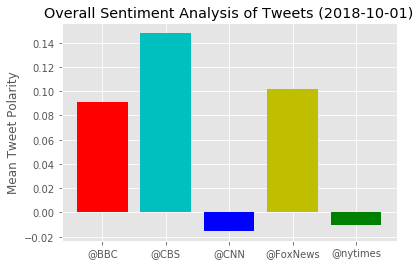

In [81]:
news_df_grouped=news_df.groupby("Name").mean()

plt.bar(news_df_grouped.index,news_df_grouped["Compound"],color=['r','c','b','y','g'])
plt.title(f"Overall Sentiment Analysis of Tweets ({now})")
plt.ylabel("Mean Tweet Polarity")
plt.savefig("Mean_Sentiments.png")
plt.show()

Observable trends

- CNN and NY Times are the most balance in their distriution of tweets as far as positive/negative
- CBS overall had the most positive tweet distibution
- Most of the tweets were not neutral but either positive/negative